# How to debug the ai model

In many cases it is very important to be able to debug your trained model. For this purpose neuroracer_ai lets you use some implemented debugging methods. These methods will be shown below.

## Imports

In [1]:
from neuroracer_ai import AI

import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load AI

In [2]:
model_name = "sim_small_net01"
model_dir  = "models/sim_small_net01"

ai = AI.load(model_name, model_dir)

## Load seed image

The seed image is used as the input data for the visualization.

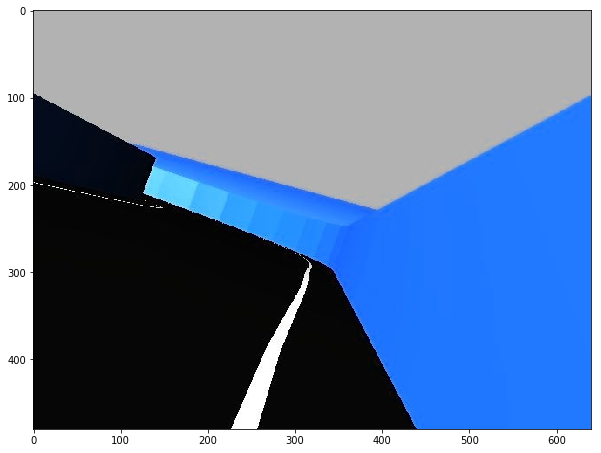

In [3]:
img = cv2.imread("images/test_img.jpg")
seed_img = np.expand_dims(img, 0)
seed_img = np.expand_dims(seed_img, 0)

fig=plt.figure(figsize=(10, 10))
plt.imshow(img)

## First debug method *get_summary()*

The __get_summary()__ debug method returns the ai model structure (layers) as a string. You can use this method to see the models architecture. You can see the layers output shape and the number of parameters (weights).

ai.get_summary()'s pydoc is thew following (can be found in __neuroracer_ai/ai.py__):

```python
def get_summary(self):
    """
    Constructs the summary of the structure and returns it as a string.

    :return: summary string of the model
    :rtype: str
    """
```

In [4]:
summary = ai.get_summary()
print(summary)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 16, 64, 8)         1184      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 64, 8)         32        
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 60, 16)        3216      
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 60, 16)        64        
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 56, 16)         6416      
_________________________________________________________________
flattened_observation (Flatt (None, 7168)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               1075350   
__________

## Debug method visualize_activation(...)

With __visualize_activation(...)__ you can, as the name says, visualize the activation of a layer. You can choose the layer by name or by index, here index. Also most of the time you should set an input image on which the activation gets calculated. Below is an example of the activation visualization of the layers from index 0 to 5. For more information read [keras-vis activation_maximization](https://raghakot.github.io/keras-vis/visualizations/activation_maximization/).

ai.visualize_activation()'s pydoc is the following (also found in __neuroracer_ai/ai.py__):

```python
def visualize_activation(self, layer_name=None, layer_idx=None, filter_indices=None,
                         seed_input=None):
    """
    Visualizes the activation of the nn and returns it as a numpy array.

    :param layer_name: name of the layer to visualize (only name or idx is
            needed, if both is supplied idx has priority)
    :type layer_name: str
    :param layer_idx: index of the layer to visualize (only name or idx is
            needed, if both is supplied idx has priority)
    :type layer_idx: int
    :param filter_indices: list of indices from filters which get
            visualized. if none all are visualized
    :type filter_indices: List[int]
    :param seed_input: list of images which help the visualization to
            converge
    :type seed_input: np.ndarray
    :return: visualization
    :rtype: np.ndarray
    :raises TypeError: if the backend doesn't support visualization
    """
```

/home/user/.local/lib/python2.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


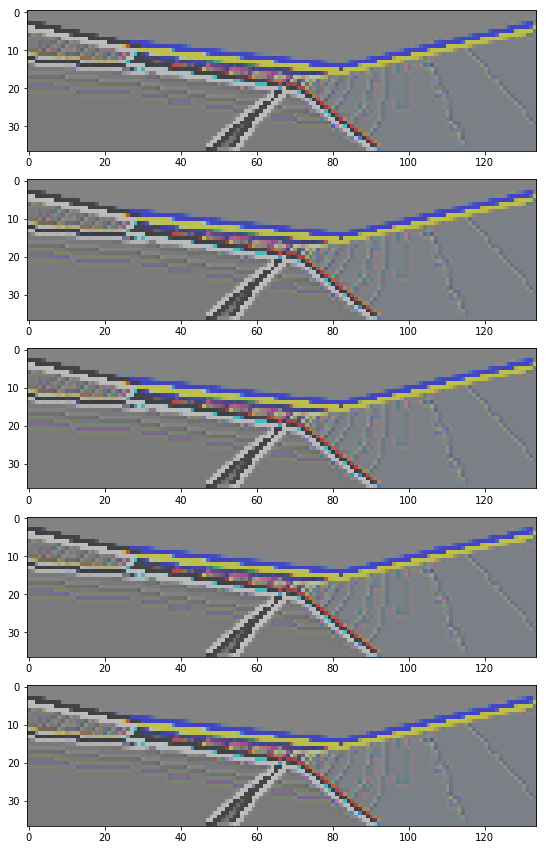

In [5]:
fig=plt.figure(figsize=(15, 15))
for i in range(0, 5):
    out = ai.visualize_activation(layer_idx=i, seed_input=seed_img)
    fig.add_subplot(5, 1, i+1)
    plt.imshow(out)
plt.show()

## Debug method visualize_saliency(...)

Now __visualize_saliency(...)__ you can, same as by visualize_activation(...), visualize the saliency of a layer. You can choose the layer by name or by index, here index. Here you should also use an input image on which the saliency gets calculated. Below is an example of the saliency visualization of the layers from index 0 to 5. For more information read [keras-vis saliency](https://raghakot.github.io/keras-vis/visualizations/saliency/).

ai.visualize_saliency()'s pydoc is the following (again found in __neuroracer_ai/ai.py__):

```python
def visualize_saliency(self, layer_name=None, layer_idx=None, filter_indices=None,
                       seed_input=None):
    """
    Visualizes the saliency of the nn and returns it as a numpy array.

    :param layer_name: name of the layer to visualize (only name or idx is
            needed, if both is supplied idx has priority)
    :type layer_name: str
    :param layer_idx: index of the layer to visualize (only name or idx is
            needed, if both is supplied idx has priority)
    :type layer_idx: int
    :param filter_indices: list of indices from filters which get
            visualized. if none all are visualized
    :type filter_indices: List[int]
    :param seed_input: list of images which help the visualization to
            converge
    :type seed_input: np.ndarray
    :return: visualization
    :rtype: np.ndarray
    :raises TypeError: if the backend doesn't support visualization
    """
```

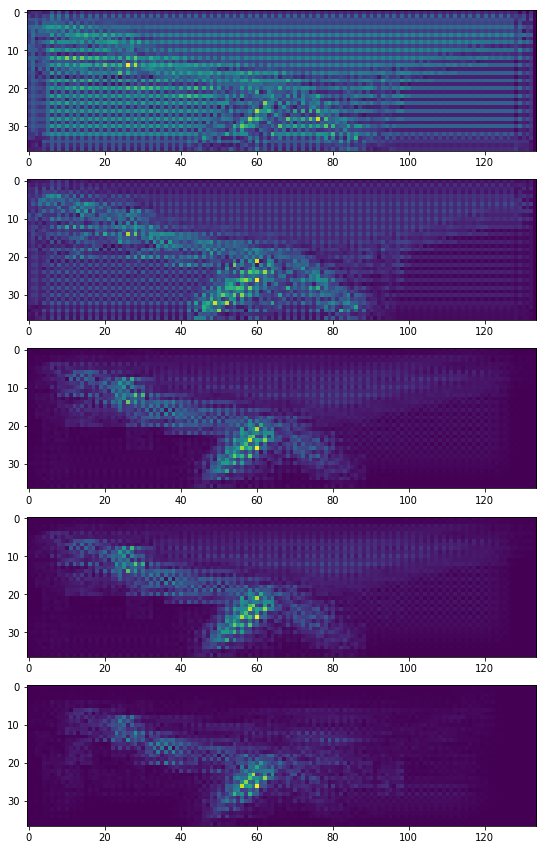

In [6]:
fig=plt.figure(figsize=(15, 15))
for i in range(0, 5):
    out = ai.visualize_saliency(layer_idx=i, seed_input=seed_img)
    fig.add_subplot(5, 1, i+1)
    plt.imshow(out)
plt.show()

## Debug method get_weights(...)

Last but not least the __get_weights(...)__ methods. You can use this method to get the weights from a specific layer. The layer can be selected by name or by index. As we can see in __get_summary()__ the layer with index 0 should have __1184__ weights, let us check this.

ai.get_weights()'s pydoc is the following (you guessed it, found in __neuroracer_ai/ai.py__):

```python
def get_weights(self, layer_name=None, layer_idx=None):
    """
    Retrieves the weights from a certain layer.

    :param layer_name: name of the layer. if both layer_idx and layer_name
            are given layer_name has priority.
    :param layer_idx: index of the layer
    :return: weights of the layer
    :rtype: np.ndarray
    """
```

In [7]:
weights_00 = ai.get_weights(layer_idx=0)
weights_00 = np.asarray(weights_00)

shape0 = weights_00[0].shape # trainable weights
shape1 = weights_00[1].shape # non trainable weights

print(shape0)
print(shape1)

print("layer 0 1184 weights?: {}".format(shape0[0]*shape0[1]*shape0[2]*shape0[3] + shape1[0] == 1184))

(7, 7, 3, 8)
(8,)
layer 0 1184 weights?: True
